# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.options.display.max_columns = 500

In [2]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', None)

In [3]:
data = pd.read_csv("students_data.csv")

data.shape

(1044, 36)

In [4]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [5]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Часть 1. Предобработка данных

* Разделите данные на две части - данные для моделирования (80%) и отложенную выборку (20%). Убедитесь, что распределение целевой переменной (`G3`) одинаково в обоих частях.  
  __NB__: Отложенную выборку нужно использовать только для финальной оценки качества модели. Обучение и кросс-валидацию следует проводить на данных для моделирования.  
* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

In [6]:
X, y = data.drop(columns=['G3']), data['G3']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

[]

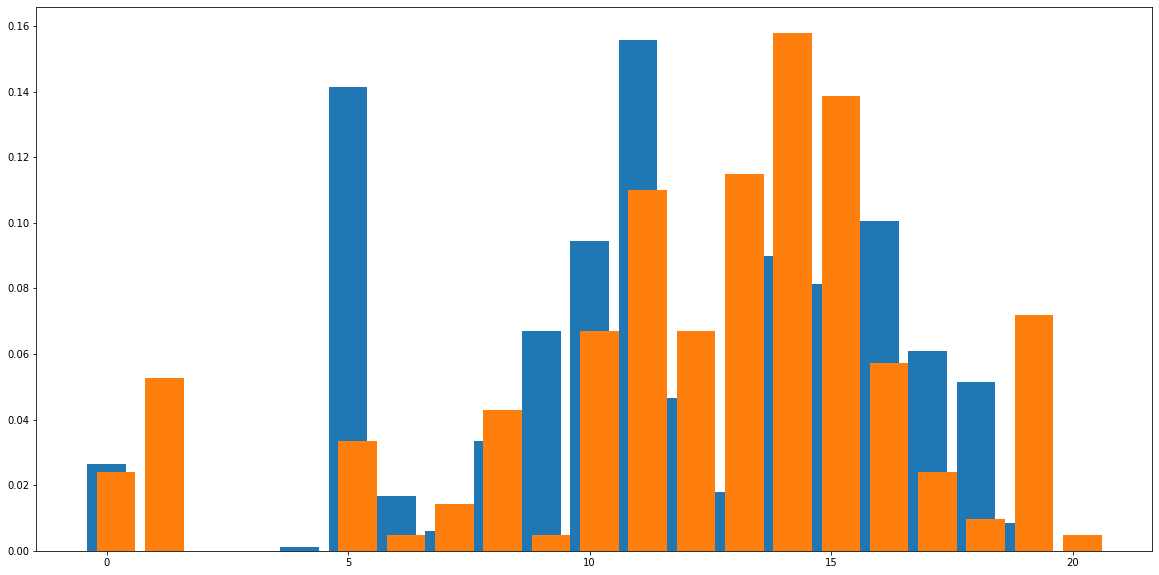

In [8]:
plt.figure(figsize=(20, 10))
ax = plt.subplot()
ax.bar(y_train.unique(), y_train.value_counts() / y_train.count())
ax.bar(y_test.unique() + 0.2, y_test.value_counts() / y_test.count())
ax.plot()

В целом, распределение классов получилось одинаковое, но есть перевесы

In [9]:
for column in X_train.columns:
    if column == 'ID':
        continue
    print(column, ': ', X_train[column].unique())

Subject :  ['Math' 'Por']
school :  ['GP' 'MS']
sex :  ['F' 'M' 'm']
age :  [16 18 15 17 19 22 20 21]
address :  ['U' 'R']
famsize :  ['GT3' 'LE3']
Pstatus :  ['A' 'T' 't']
Medu :  ['3' '4' '2' '1' '0' 'o']
Fedu :  ['4' '3' '2' '1' 'o' '0']
Mjob :  ['services' 'other' 'teacher' 'at_home' 'at-home' 'health']
Fjob :  ['other' 'services' 'health' 'teacher' 'at_home' 'at-home']
reason :  ['course' 'home' 'reputation' 'other']
guardian :  ['father' 'mother' 'other' 'futher']
traveltime :  [1 2 3 4]
studytime :  [1 2 3 4]
failures :  [0 1 3 2]
schoolsup :  ['no' 'yes']
famsup :  ['no' 'yes']
paid :  ['no' 'yes']
activities :  ['no' 'yes']
nursery :  ['yes' 'no']
higher :  ['yes' 'no']
internet :  ['yes' 'no']
romantic :  ['no' 'yes' nan]
famrel :  [ 3.  4.  5.  2.  1. nan]
freetime :  [2 3 1 4 5]
goout :  [1 3 4 5 2]
Dalc :  [ 1.  2.  3.  4.  5. nan]
Walc :  [ 4.  3.  1.  2.  5. nan]
health :  [5 4 2 3 1]
absences :  [16  8  0 10  4  9 19  2 12  6 25 14 13 20  3 21  7  1 30 15 17  5 38 56
 2

Можно видеть, что в данных достаточно ошибок. Исправим это, используя наработки из первой лабораторной

In [10]:
def fix(data_in):
    data = data_in.copy()
    for i, row in data.iterrows():
        data.at[i, 'sex'] = data.at[i, 'sex'].upper()
        data.at[i, 'Pstatus'] = data.at[i, 'Pstatus'].upper()
            
        for letter in ['M', 'F']:
            if data.at[i, f'{letter}edu'] == 'o':
                data.at[i, f'{letter}edu'] = '0'
            data.at[i, f'{letter}edu'] = int(data.at[i, f'{letter}edu'])
            data.at[i, f'{letter}job'] = data.at[i, f'{letter}job'].replace('-', '_')

        if data.at[i, 'guardian'] == 'futher':
            data.at[i, 'guardian'] = 'father'
            
    data.Medu = data.Medu.astype('int64')
    data.Fedu = data.Fedu.astype('int64')
    return data

In [11]:
X_train_fixed = fix(X_train)

for column in X_train_fixed.columns:
    if column == 'ID':
        continue
    print(column, ': ', X_train_fixed[column].unique())

Subject :  ['Math' 'Por']
school :  ['GP' 'MS']
sex :  ['F' 'M']
age :  [16 18 15 17 19 22 20 21]
address :  ['U' 'R']
famsize :  ['GT3' 'LE3']
Pstatus :  ['A' 'T']
Medu :  [3 4 2 1 0]
Fedu :  [4 3 2 1 0]
Mjob :  ['services' 'other' 'teacher' 'at_home' 'health']
Fjob :  ['other' 'services' 'health' 'teacher' 'at_home']
reason :  ['course' 'home' 'reputation' 'other']
guardian :  ['father' 'mother' 'other']
traveltime :  [1 2 3 4]
studytime :  [1 2 3 4]
failures :  [0 1 3 2]
schoolsup :  ['no' 'yes']
famsup :  ['no' 'yes']
paid :  ['no' 'yes']
activities :  ['no' 'yes']
nursery :  ['yes' 'no']
higher :  ['yes' 'no']
internet :  ['yes' 'no']
romantic :  ['no' 'yes' nan]
famrel :  [ 3.  4.  5.  2.  1. nan]
freetime :  [2 3 1 4 5]
goout :  [1 3 4 5 2]
Dalc :  [ 1.  2.  3.  4.  5. nan]
Walc :  [ 4.  3.  1.  2.  5. nan]
health :  [5 4 2 3 1]
absences :  [16  8  0 10  4  9 19  2 12  6 25 14 13 20  3 21  7  1 30 15 17  5 38 56
 22 18 28 26 32 11 75 24 23]
cheating :  ['no' nan 'yes']
G1 :  [12

В колонках romantic, famrel, Dalc, Walc, cheating наблюдаются пропуски, а колонка ID не имеет смысла

In [12]:
X_train_fixed.isna().sum()

ID              0
Subject         0
school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        8
famrel          9
freetime        0
goout           0
Dalc            9
Walc            9
health          0
absences        0
cheating      556
G1              0
G2              0
dtype: int64

cheating можно удалить совсем - пропусков слишком много

По остальным признакам пропусков немного, поэтому записи можно удалить

In [13]:
def drop(data):
    return data.drop(columns=['ID', 'cheating']).dropna(subset=['romantic', 'famrel', 'Dalc', 'Walc'])

X_train_dropped = drop(X_train_fixed)

Удалим выбросы из данных

In [14]:
def exclude_outs(data):
    numeric_data = []

    for column, dtype in zip(data.columns, data.dtypes):
        if dtype == 'int64' or dtype == 'float64':
            numeric_data.append(column)
    return data[(np.abs(sp.stats.zscore(data[numeric_data])) < 3).all(axis=1)]
        
X_train_no_outs = exclude_outs(X_train_dropped)
X_train_no_outs

,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
224,Math,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,16,12,11
187,Math,GP,M,18,R,LE3,T,3,3,other,services,course,mother,1,2,1,no,yes,no,no,yes,yes,yes,yes,4.0,3,3,1.0,3.0,5,8,3,5
155,Por,MS,F,15,R,GT3,T,3,3,other,services,course,father,2,1,0,no,no,no,no,no,yes,yes,no,4.0,1,3,1.0,1.0,4,0,14,16
376,Por,GP,M,18,U,LE3,T,3,3,services,health,home,father,1,2,0,no,yes,no,no,yes,yes,yes,no,3.0,2,4,2.0,4.0,4,10,10,10
571,Por,GP,M,17,U,GT3,T,4,4,services,teacher,home,mother,1,1,0,no,no,no,no,yes,yes,yes,no,5.0,2,3,1.0,2.0,5,4,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,Por,GP,F,17,U,GT3,T,3,2,other,other,course,father,1,2,0,no,no,no,yes,yes,yes,no,no,5.0,4,2,1.0,1.0,3,4,14,14
312,Math,GP,M,15,U,GT3,T,4,0,teacher,other,course,mother,2,4,0,no,no,no,yes,yes,yes,yes,no,3.0,4,3,1.0,1.0,1,8,11,11
690,Por,GP,M,18,U,LE3,T,2,1,services,other,course,mother,3,2,1,no,no,no,yes,no,no,yes,no,4.0,4,5,4.0,4.0,5,4,11,10
261,Por,GP,F,17,U,LE3,T,4,3,health,other,reputation,father,1,2,0,no,no,no,yes,yes,yes,yes,yes,3.0,2,3,1.0,2.0,3,0,14,12


Т.к. у нас изменилась размерность данных, то она же должна измениться у целевой переменной

In [15]:
y_train_dropped = y_train[X_train_no_outs.index]
y_train_dropped

224    11
187     5
155    16
376    10
571    14
       ..
243    15
312    10
690    11
261    12
617    11
Name: G3, Length: 706, dtype: int64

Трансформируем признаки - категориальные закодируем с помощью OneHotEncoder, а числовые - MinMaxScaler

In [16]:
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
 

def get_categ_cols(data):
    return data[set(data.columns) - set(get_num_cols(data))]
 

def get_num_cols(data):
    numeric_data = [column for column, dtype in zip(data.columns, data.dtypes) if '64' in str(dtype)]
    return data[numeric_data]


vec = make_union(*[
   make_pipeline(FunctionTransformer(get_categ_cols, validate=False),  OneHotEncoder(sparse=False)),
   make_pipeline(FunctionTransformer(get_num_cols, validate=False), SimpleImputer(strategy='median'), MinMaxScaler()),
])

In [17]:
vec.fit(X_train_no_outs)

X_train_transformed = pd.DataFrame(vec.transform(X_train_no_outs))
X_train_transformed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,...,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.2,0.75,1.00,0.0,0.000000,0.0,0.333333,0.25,0.00,0.000000,0.75,1.00,0.695652,0.5625,0.466667
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.6,0.75,0.75,0.0,0.333333,0.5,0.666667,0.50,0.50,0.000000,0.50,1.00,0.347826,0.0000,0.066667
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.75,0.75,0.5,0.000000,0.0,0.666667,0.00,0.50,0.000000,0.00,0.75,0.000000,0.6875,0.800000
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.6,0.75,0.75,0.0,0.333333,0.0,0.333333,0.25,0.75,0.333333,0.75,0.75,0.434783,0.4375,0.400000
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.4,1.00,1.00,0.0,0.000000,0.0,1.000000,0.25,0.50,0.000000,0.25,1.00,0.173913,0.6250,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.4,0.75,0.50,0.0,0.333333,0.0,1.000000,0.75,0.25,0.000000,0.00,0.50,0.173913,0.6875,0.666667
702,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.00,0.00,0.5,1.000000,0.0,0.333333,0.75,0.50,0.000000,0.00,0.00,0.347826,0.5000,0.466667
703,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.6,0.50,0.25,1.0,0.333333,0.5,0.666667,0.75,1.00,1.000000,0.75,1.00,0.173913,0.5000,0.400000
704,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.4,1.00,0.75,0.0,0.333333,0.0,0.333333,0.25,0.50,0.000000,0.25,0.50,0.000000,0.6875,0.533333


Починим колонки трансформированного датасета

In [18]:
categ = vec.transformer_list[0][1].steps[1][1].get_feature_names(get_categ_cols(X_train_no_outs).columns)

In [19]:
num_mean = np.array(get_num_cols(X_train_no_outs).columns)

In [20]:
print(categ.shape)
print(num_mean.shape)

cols = np.append(categ, num_mean)
cols

(45,)
(15,)


array(['address_R', 'address_U', 'internet_no', 'internet_yes',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'paid_no', 'paid_yes', 'Pstatus_A',
       'Pstatus_T', 'guardian_father', 'guardian_mother',
       'guardian_other', 'higher_no', 'higher_yes', 'schoolsup_no',
       'schoolsup_yes', 'school_GP', 'school_MS', 'Subject_Math',
       'Subject_Por', 'nursery_no', 'nursery_yes', 'famsize_GT3',
       'famsize_LE3', 'activities_no', 'activities_yes', 'romantic_no',
       'romantic_yes', 'sex_F', 'sex_M', 'famsup_no', 'famsup_yes',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2'], dtype=object)

In [21]:
X_train_transformed.columns = cols
X_train_transformed

,address_R,address_U,internet_no,internet_yes,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,paid_no,paid_yes,Pstatus_A,Pstatus_T,guardian_father,guardian_mother,guardian_other,...,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.2,0.75,1.00,0.0,0.000000,0.0,0.333333,0.25,0.00,0.000000,0.75,1.00,0.695652,0.5625,0.466667
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.6,0.75,0.75,0.0,0.333333,0.5,0.666667,0.50,0.50,0.000000,0.50,1.00,0.347826,0.0000,0.066667
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.75,0.75,0.5,0.000000,0.0,0.666667,0.00,0.50,0.000000,0.00,0.75,0.000000,0.6875,0.800000
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.6,0.75,0.75,0.0,0.333333,0.0,0.333333,0.25,0.75,0.333333,0.75,0.75,0.434783,0.4375,0.400000
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.4,1.00,1.00,0.0,0.000000,0.0,1.000000,0.25,0.50,0.000000,0.25,1.00,0.173913,0.6250,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.4,0.75,0.50,0.0,0.333333,0.0,1.000000,0.75,0.25,0.000000,0.00,0.50,0.173913,0.6875,0.666667
702,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.00,0.00,0.5,1.000000,0.0,0.333333,0.75,0.50,0.000000,0.00,0.00,0.347826,0.5000,0.466667
703,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.6,0.50,0.25,1.0,0.333333,0.5,0.666667,0.75,1.00,1.000000,0.75,1.00,0.173913,0.5000,0.400000
704,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.4,1.00,0.75,0.0,0.333333,0.0,0.333333,0.25,0.50,0.000000,0.25,0.50,0.000000,0.6875,0.533333


Рассмотрим влияние признаков на итоговую оценку. Для этого расммотрим матрицу корреляций для числовых признаков

<AxesSubplot:>

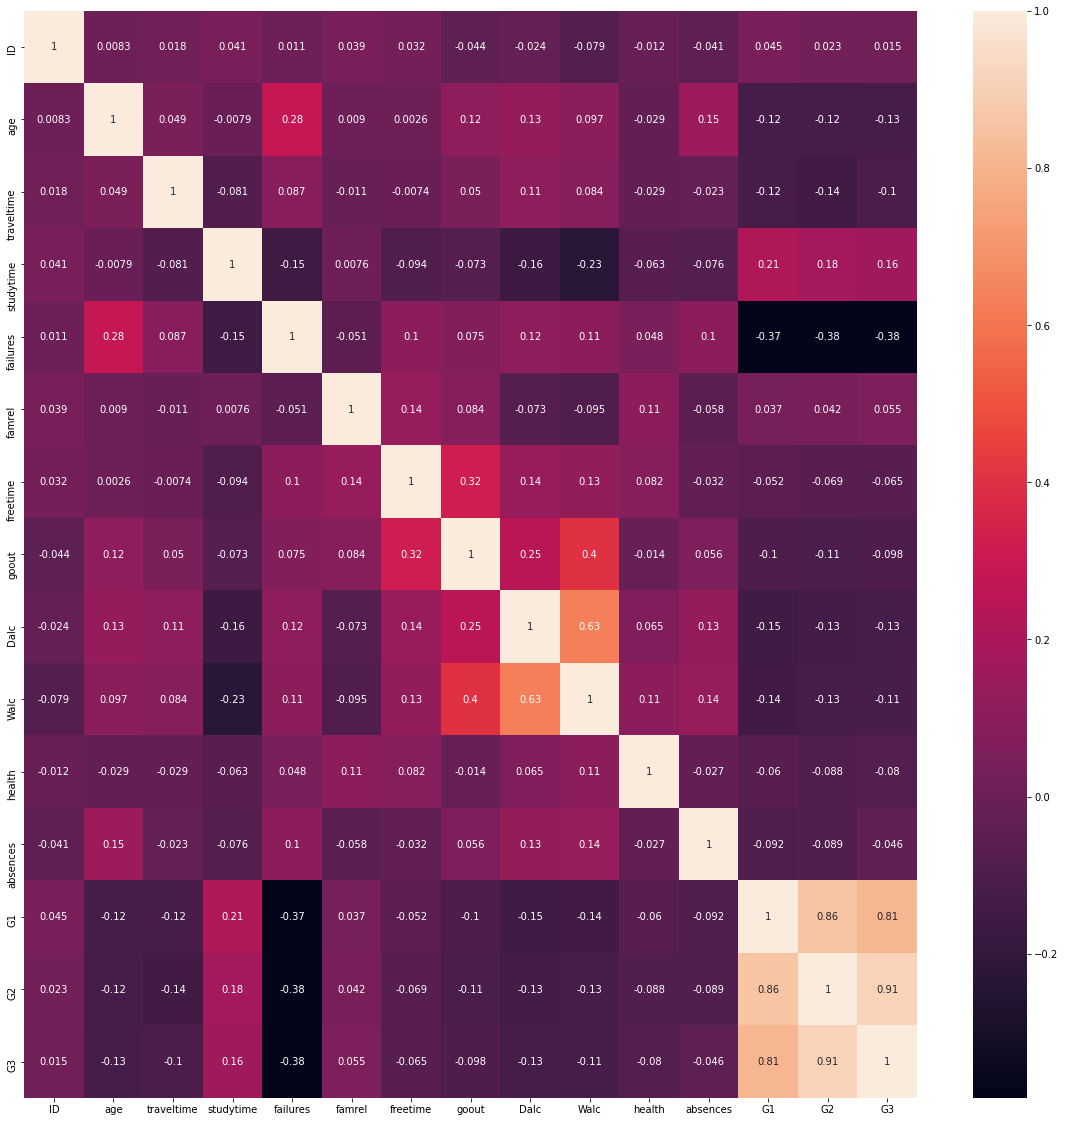

In [22]:
fig, ax = plt.subplots(figsize=(20,20))

corr = data[get_num_cols(data).columns].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, ax=ax)

Как можно видеть, на итоговую оценку сильно влияют остальные оценки, число заваленных экзаменов, и время, уделяемое учёбе. Про остальные признаки сказать что-то утвердительно нельзя

In [23]:
data_categ_and_Gs = pd.concat([data[get_categ_cols(data).columns].apply(lambda x : pd.factorize(x)[0]), data[['G1', 'G2', 'G3']]], axis=1)

<AxesSubplot:>

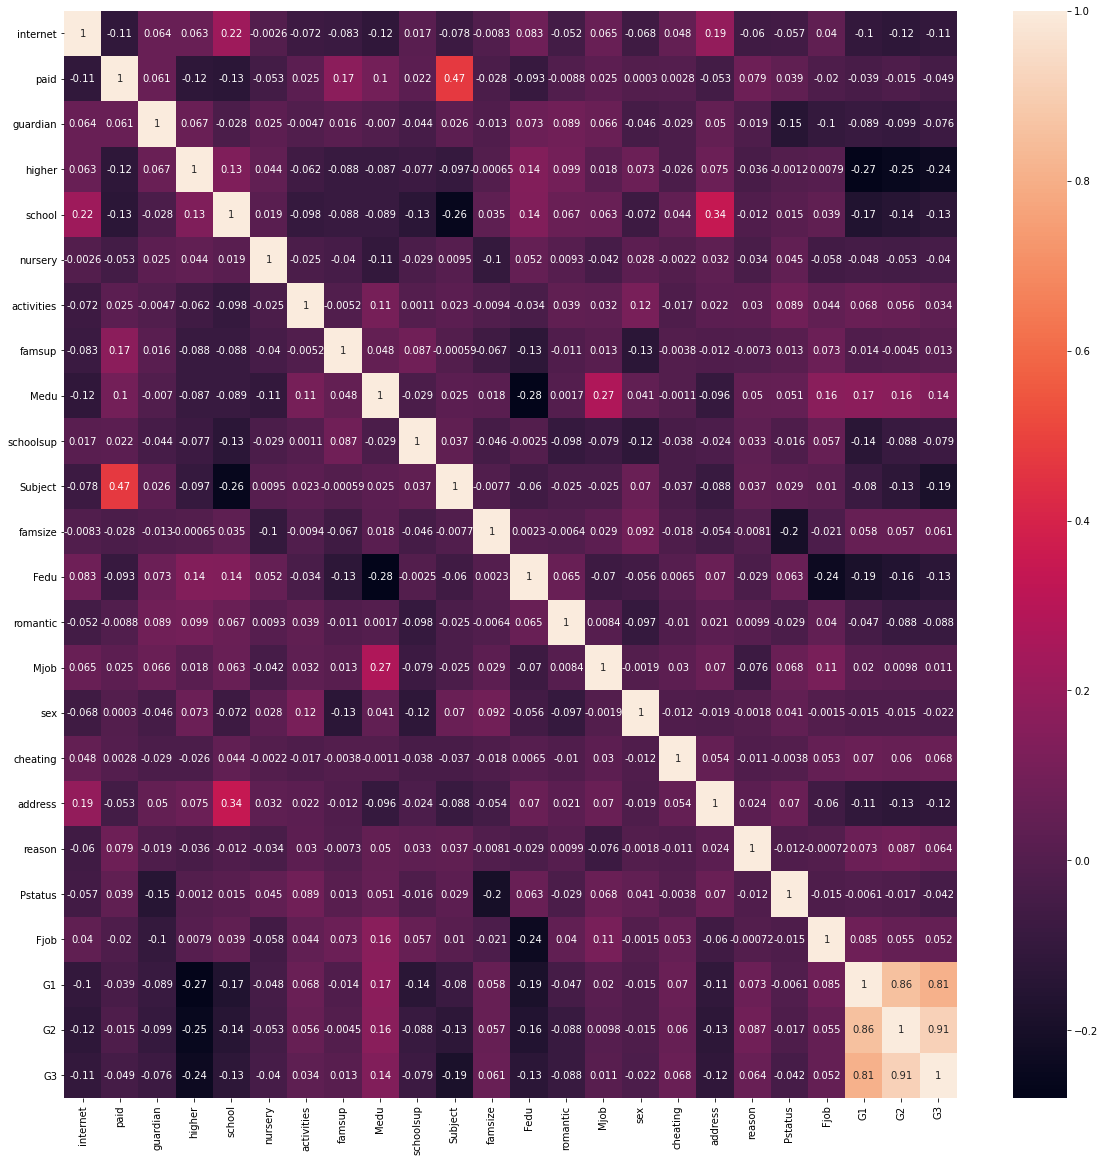

In [24]:
fig, ax = plt.subplots(figsize=(20, 20))

corr = data_categ_and_Gs.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, ax=ax)

Что касается категориальных данных, то сильно влияющих признаков нет, однако можно сказать, что наличие интернета, выбранный предмет, адрес, желание пойти в ВУЗ, образование родителей и школа влияют на итоговую оценку.

Удалять какие-либо признаки я не буду, т.к. возможно, что не были учтены какие-то влияния. Исключения: были удалены признаки ID и cheating, т.к. первый не имеет смысла в нашей задаче, а во втором много пропусков

## Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* Для решения задачи примените следующие методы:  
  * Линейная регрессия + регуляризации  
  * Полиномиальная регрессия  
  * KNN  
  * Деревья решений, Random Forest  
  
  Для каждого метода выполните настройку гиперпараметров на кросс-валидации.  
<br>    
* Оцените качество каждой модели на отложенной выборке, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

In [25]:
X_train_G1 = X_train_transformed.drop(columns=['G2'])
X_train_no_G1 = X_train_transformed.drop(columns=['G1', 'G2'])

In [26]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

Т.к. в модуле sklearn нет полиномиальной регрессии, сделаем её сами, "скрестив" PolynomialFeatures и обычную LinearRegression, используя те параметры, которые мы уже перебираем для линейной регрессии

In [27]:
from sklearn.base import BaseEstimator

class PolynomialRegression(BaseEstimator):
    def __init__(self,
                 degree=2,
                 interaction_only=False,
                 include_bias=True,
                 order='C',
                 fit_intercept=True,
                 normalize=False,
                 n_jobs=None):
        self.degree = degree
        self.interaction_only = interaction_only
        self.include_bias = include_bias
        self.order = order
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.n_jobs = n_jobs
        self._poly = PolynomialFeatures(degree, interaction_only, include_bias, order)
        self._linear = LinearRegression(fit_intercept, normalize, n_jobs)
        self._polyreg = make_pipeline(self._poly, self._linear)
        
    
    def fit(self, X, y):
        self._polyreg.fit(X, y)
        return self._polyreg
    
    
    def predict(self, X, y=None):
        return self._polyreg.predict(X)

In [28]:
linear_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'n_jobs': range(1, 15)
}

lasso_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'max_iter': range(1, 15),
    'alpha': np.linspace(1e-4, 1000, 200),
    'tol': np.linspace(1e-6, 1, 1000),
    'selection': ['cyclic', 'random']
}

ridge_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'max_iter': range(1, 100),
    'alpha': np.linspace(1e-4, 1000, 200),
    'tol': np.linspace(1e-6, 1, 1000),
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

poly_params = {
    'degree': range(1, 5),
    'interaction_only': [True, False],
    'include_bias': [True, False],
    'order': ['C', 'F'],
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'n_jobs': range(1, 15)
}

knr_params = {
    'n_neighbors': range(1, 15),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(1, 50),
    'metric': ['euclidean','manhattan','minkowski']
}

dtr_params = {
    'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 10),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

rfr_params = {
    'n_estimators': range(1, 200),
    'criterion': ['mse', 'mae'],
    'max_depth': range(2, 10),
    'min_samples_split': range(2, 10),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

### С использованием признака G1

In [30]:
linear_G1 = RandomizedSearchCV(
    estimator=LinearRegression(),
    param_distributions=linear_params,
    scoring='neg_mean_squared_error',
    n_iter=25
).fit(X_train_G1, y_train_dropped).best_estimator_

print(linear_G1)

lasso_G1 = RandomizedSearchCV(
    estimator=Lasso(),
    param_distributions=lasso_params,
    scoring='neg_mean_squared_error',
    n_iter=25
).fit(X_train_G1, y_train_dropped).best_estimator_

print(lasso_G1)

ridge_G1 = RandomizedSearchCV(
    estimator=Ridge(),
    param_distributions=ridge_params,
    scoring='neg_mean_squared_error',
    n_iter=25
).fit(X_train_G1, y_train_dropped).best_estimator_

print(ridge_G1)

poly_G1 = RandomizedSearchCV(
    estimator=PolynomialRegression(),
    param_distributions=poly_params,
    scoring='neg_mean_squared_error',
    n_iter=25
).fit(X_train_G1, y_train_dropped).best_estimator_

print(poly_G1)

knr_G1 = RandomizedSearchCV(
    estimator=KNeighborsRegressor(),
    param_distributions=knr_params,
    scoring='neg_mean_squared_error',
    n_iter=25
).fit(X_train_G1, y_train_dropped).best_estimator_

print(knr_G1)

dtr_G1 = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(),
    param_distributions=dtr_params,
    scoring='neg_mean_squared_error',
    n_iter=25
).fit(X_train_G1, y_train_dropped).best_estimator_

print(dtr_G1)

rfr_G1 = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=rfr_params,
    scoring='neg_mean_squared_error',
    n_iter=25
).fit(X_train_G1, y_train_dropped).best_estimator_

print(rfr_G1)

LinearRegression(n_jobs=14)
Lasso(alpha=211.05535527638193, max_iter=9, normalize=True,
      tol=0.13713799999999998)
Ridge(alpha=75.37697688442212, max_iter=23, tol=0.42642699999999994)


c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=True, normalize=False, copy_X=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=True, normalize=False, copy_X=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=True, normalize=False, copy_X=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=True, normalize=False, copy_X=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=True, normalize=False, copy_X=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=True, normalize=False, copy_X=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=True, normalize=False, copy_X=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=True, normalize=False, copy_X=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=True, normalize=False, copy_X=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=True, normalize=False, copy_X=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=True, normalize=False, copy_X=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


PolynomialRegression(include_bias=False, n_jobs=11, order='F')
KNeighborsRegressor(leaf_size=21, metric='manhattan', n_neighbors=10,
                    weights='distance')
DecisionTreeRegressor(max_depth=4, max_features='auto', min_samples_split=8)
RandomForestRegressor(max_depth=5, max_features=None, min_samples_split=9,
                      n_estimators=66)


### Без использования признака G1

In [31]:
linear_no_G1 = RandomizedSearchCV(
    estimator=LinearRegression(),
    param_distributions=linear_params,
    scoring='neg_mean_squared_error',
    n_iter=25
).fit(X_train_no_G1, y_train_dropped).best_estimator_

print(linear_no_G1)

lasso_no_G1 = RandomizedSearchCV(
    estimator=Lasso(),
    param_distributions=lasso_params,
    scoring='neg_mean_squared_error',
    n_iter=25
).fit(X_train_no_G1, y_train_dropped).best_estimator_

print(lasso_no_G1)

ridge_no_G1 = RandomizedSearchCV(
    estimator=Ridge(),
    param_distributions=ridge_params,
    scoring='neg_mean_squared_error',
    n_iter=25
).fit(X_train_no_G1, y_train_dropped).best_estimator_

print(ridge_no_G1)

poly_no_G1 = RandomizedSearchCV(
    estimator=PolynomialRegression(),
    param_distributions=poly_params,
    scoring='neg_mean_squared_error',
    n_iter=25
).fit(X_train_no_G1, y_train_dropped).best_estimator_

print(poly_no_G1)

knr_no_G1 = RandomizedSearchCV(
    estimator=KNeighborsRegressor(),
    param_distributions=knr_params,
    scoring='neg_mean_squared_error',
    n_iter=25
).fit(X_train_no_G1, y_train_dropped).best_estimator_

print(knr_no_G1)

dtr_no_G1 = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(),
    param_distributions=dtr_params,
    scoring='neg_mean_squared_error',
    n_iter=25
).fit(X_train_no_G1, y_train_dropped).best_estimator_

print(dtr_no_G1)

rfr_no_G1 = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=rfr_params,
    scoring='neg_mean_squared_error',
    n_iter=25
).fit(X_train_no_G1, y_train_dropped).best_estimator_

print(rfr_no_G1)

LinearRegression(fit_intercept=False, n_jobs=14, normalize=True)
Lasso(alpha=753.7688688442211, max_iter=11, normalize=True, selection='random',
      tol=0.8998999999999999)
Ridge(alpha=20.100600502512563, fit_intercept=False, max_iter=90,
      normalize=True, solver='svd', tol=0.44944999999999996)


c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=True, normalize=False, copy_X=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=True, normalize=False, copy_X=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=True, normalize=False, copy_X=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=True, normalize=False, copy_X=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=True, normalize=False, copy_X=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=True, normalize=False, copy_X=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=True, normalize=False, copy_X=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=True, normalize=False, copy_X=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=True, normalize=False, copy_X=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=True, normalize=False, copy_X=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=True, normalize=False, copy_X=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\users\rc199\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass interaction_only=False, include_bias=True, order=C as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


PolynomialRegression(degree=3, fit_intercept=False, interaction_only=True,
                     n_jobs=11, normalize=True)
KNeighborsRegressor(algorithm='kd_tree', leaf_size=40, metric='manhattan',
                    n_neighbors=12, weights='distance')
DecisionTreeRegressor(criterion='friedman_mse', max_depth=1,
                      min_samples_split=9)
RandomForestRegressor(max_depth=6, max_features=None, n_estimators=191)


### Сравнение моделей

In [32]:
models = {
    'linear_G1': linear_G1,
    'lasso_G1': lasso_G1,
    'ridge_G1': ridge_G1,
    'poly_G1': poly_G1,
    'knr_G1': knr_G1,
    'dtr_G1': dtr_G1,
    'rfr_G1': rfr_G1,
    'linear_no_G1': linear_no_G1,
    'lasso_no_G1': lasso_no_G1,
    'ridge_no_G1': ridge_no_G1,
    'poly_no_G1': poly_no_G1,
    'knr_no_G1': knr_no_G1,
    'dtr_no_G1': dtr_no_G1,
    'rfr_no_G1': rfr_no_G1
}

In [33]:
metrics = {
    'explained_variance_score': explained_variance_score,
    'max_error': max_error,
    'mean_absolute_error': mean_absolute_error,
    'mean_squared_error': mean_squared_error,
    'median_absolute_error': median_absolute_error,
    'r2_score': r2_score
}

In [34]:
model_results = pd.DataFrame(columns=metrics.keys())

In [35]:
X_test_fixed = fix(X_test)
X_test_dropped = drop(X_test_fixed)

y_test_dropped = y_test[X_test_dropped.index]

X_test_transformed = pd.DataFrame(vec.transform(X_test_dropped), columns=cols)

In [36]:
X_test_G1 = X_test_transformed.drop(columns=['G2'])
X_test_no_G1 = X_test_transformed.drop(columns=['G1', 'G2'])

In [37]:
for model_name, model in models.items():
    if 'no_G1' in model_name:
        y_pred = model.predict(X_test_no_G1)
    else:
        y_pred = model.predict(X_test_G1)
    
    for metric_name, metric in metrics.items():
        score = metric(y_test_dropped, y_pred)
        model_results.loc[model_name, metric_name] = score

In [38]:
model_results

,explained_variance_score,max_error,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
linear_G1,0.635209,11.761719,1.623181,6.254312,1.097656,0.628042
lasso_G1,0.0,11.749292,2.911779,17.044663,1.749292,-0.013684
ridge_G1,0.327701,12.371692,2.197638,11.432178,1.276535,0.320103
poly_G1,-6934470192993134592.0,44436193213.878357,5976245378.607866,116746566573299793920.0,1360465476.00174,-6943180276688904192.0
knr_G1,0.192753,13.615133,2.489338,14.45382,1.537422,0.140399
dtr_G1,0.66722,11.404255,1.574219,5.708817,1.229508,0.660484
rfr_G1,0.675973,11.290289,1.553031,5.500217,1.088877,0.67289
linear_no_G1,0.195662,13.879028,2.549334,13.600666,1.766015,0.191138
lasso_no_G1,0.0,11.749292,2.911779,17.044663,1.749292,-0.013684
ridge_no_G1,0.194062,13.148813,2.503672,13.63812,1.656064,0.18891


Видно, что есть переобучение - есть даже такие модели, чьи метрики достигают 0. Однако, в целом, наличие подсказки в виде признака G1 улучшает метрики.

In [39]:
pd.DataFrame([linear_G1.coef_,
              lasso_G1.coef_,
              ridge_G1.coef_],
            index=['linear', 'lasso', 'ridge'],
            columns=X_train_G1.columns)

,address_R,address_U,internet_no,internet_yes,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,paid_no,paid_yes,Pstatus_A,Pstatus_T,guardian_father,guardian_mother,guardian_other,...,famsup_yes,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1
linear,5.200708e+13,5.200708e+13,-4.871909e+13,-4.871909e+13,2.357588e+13,2.357588e+13,2.357588e+13,2.357588e+13,2.357588e+13,-7.136129e+12,-7.136129e+12,-7.136129e+12,-7.136129e+12,-1.896380e+13,-1.896380e+13,1.136529e+11,1.136529e+11,6.041107e+13,6.041107e+13,6.041107e+13,...,-4.224861e+13,3.503413e+13,3.503413e+13,3.503413e+13,3.503413e+13,3.503413e+13,0.154297,0.218750,0.023438,0.132812,0.042969,-1.359375,0.858398,0.101562,-0.438477,-0.09375,0.480469,-0.21875,0.414062,15.195312
lasso,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,...,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.00000,-0.000000,-0.00000,-0.000000,0.000000
ridge,-2.461542e-01,2.461542e-01,-1.574921e-01,1.574921e-01,4.554802e-02,5.979045e-02,-1.893546e-01,-1.794960e-01,2.635121e-01,-1.005669e-01,-3.872070e-02,5.482322e-02,8.446433e-02,1.453975e-01,-1.453975e-01,-3.739936e-03,3.739936e-03,1.390838e-01,-8.217976e-02,-5.690406e-02,...,-3.696983e-02,-2.281016e-01,2.728285e-01,-2.675778e-01,2.156873e-01,7.163601e-03,-0.067093,0.440079,0.259608,-0.114648,0.556040,-1.234822,0.341206,-0.003109,-0.263413,-0.24653,-0.252223,-0.25087,-0.135878,3.125268


In [40]:
pd.DataFrame([linear_no_G1.coef_,
              lasso_no_G1.coef_,
              ridge_no_G1.coef_],
            index=['linear', 'lasso', 'ridge'],
            columns=X_train_no_G1.columns)

,address_R,address_U,internet_no,internet_yes,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,paid_no,paid_yes,Pstatus_A,Pstatus_T,guardian_father,guardian_mother,guardian_other,...,famsup_no,famsup_yes,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
linear,-2.141171e+10,-2.141171e+10,1.550420e+12,1.550420e+12,-1.161938e+12,-1.161938e+12,-1.161938e+12,-1.161938e+12,-1.161938e+12,-9.558475e+11,-9.558475e+11,-9.558475e+11,-9.558475e+11,1.546860e+12,1.546860e+12,4.254123e+12,4.254123e+12,-6.313669e+11,-6.313669e+11,-6.313669e+11,...,-2.839180e+12,-2.839180e+12,-9.481066e+11,-9.481066e+11,-9.481066e+11,-9.481066e+11,-9.481066e+11,0.422729,1.047363,0.156250,0.079102,1.487305,-4.425659,0.725220,0.374756,-0.780273,-0.529236,-0.161621,-0.557129,-0.183838
lasso,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000
ridge,2.538384e-01,8.522420e-01,3.452148e-01,7.608656e-01,3.486226e-01,1.969496e-01,-6.478085e-02,-9.993138e-02,7.252203e-01,1.547106e-01,2.161874e-01,4.227537e-01,3.124286e-01,7.838036e-01,3.222768e-01,4.618402e-01,6.442402e-01,5.355734e-01,2.532811e-01,3.172259e-01,...,6.703706e-01,4.357098e-01,8.986206e-03,6.603141e-01,-7.502046e-02,5.793973e-01,-6.759674e-02,0.192972,0.983640,0.517997,0.054045,1.252417,-2.647438,0.745591,0.284169,-0.438568,-0.402658,-0.274177,-0.313859,-0.151351


In [41]:
print(pd.DataFrame(linear_G1.coef_,    index=X_train_G1.columns,    columns=['coef']).sort_values('coef', ascending=False).head(4), end='\n\n')
print(pd.DataFrame(linear_no_G1.coef_, index=X_train_no_G1.columns, columns=['coef']).sort_values('coef', ascending=False).head(4), end='\n\n')
print(pd.DataFrame(ridge_G1.coef_,     index=X_train_G1.columns,    columns=['coef']).sort_values('coef', ascending=False).head(4), end='\n\n')
print(pd.DataFrame(ridge_no_G1.coef_,  index=X_train_no_G1.columns, columns=['coef']).sort_values('coef', ascending=False).head(4), end='\n\n')

                         coef
famsize_GT3      7.745347e+13
famsize_LE3      7.745347e+13
guardian_mother  6.041107e+13
guardian_other   6.041107e+13

                     coef
nursery_no   6.190801e+12
nursery_yes  6.190801e+12
Pstatus_T    4.254123e+12
Pstatus_A    4.254123e+12

                 coef
G1           3.125268
studytime    0.556040
Subject_Por  0.507370
higher_yes   0.501078

                  coef
higher_yes    1.402068
schoolsup_no  1.268468
studytime     1.252417
Subject_Por   1.197459



Lasso-регрессия решила занулить все признаки, что говорит о выборе высокого штрафующего коэффициента. В то же самое время линейная регрессия обучилась с очень высокими коэффициентами (10<sup>13</sup>), также коэффициенты при комплиментарных признаках (например, paid_yes - paid_no) равны. Гребниевая имеет сравнительно адекватные и различные веса.

Линейная регрессия посчитала более значимыми признаками семейную поддержку, платные занятия, размер семьи и желание поступать в ВУЗ. Если убрать признак G1, то лидеры меняются: размер семьи, платные курсы, выбранная школа и адрес.

Гребниевая же регрессия самым важным посчитала признак G1, потом идут: желание поступать в ВУЗ, выбранный предмет, поддержка в школе и сама школа. Если убрать признак G1, то лидерами будут: поступление в ВУЗ, поддержка в школе, предмет и платные занятия.

In [42]:
import re

coefs = poly_G1._polyreg.steps[1][1].coef_
names = poly_G1._polyreg.steps[0][1].get_feature_names()

match = {}

for i in range(len(X_train_G1.columns)):
    match['x' + str(i)] = X_train_G1.columns[i]
    
new_names = []
    
for i in range(len(names)):
    name = names[i]
    parts = re.split('[\s^]', name)
    for i in range(len(parts)):
        if 'x' in parts[i]:
            parts[i] = match[parts[i]]
        else:
            parts[i] = '^' + parts[i]
    name = ' '.join(parts)
    new_names.append(name)

In [43]:
pd.DataFrame(coefs, index=new_names, columns=['coef']).sort_values(by='coef',  ascending=False).head(4)

,coef
internet_yes,2.179252e+11
Fjob_services,2.034916e+11
nursery_no,1.087814e+11
Fjob_teacher,1.033388e+11


Самыми важными Полиномиальная регрессия посчитала произведения ```семейная_поддержка * предмет * здоровье```, ```пол * предмет * отношения_в_семье``` и другие из таблицы

## Часть 3. Бинарная классификация

Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  


In [44]:
y_train_will_pass = pd.Series([mark >= 8 for mark in y_train_dropped], index=y_train_dropped.index)
y_test_will_pass = pd.Series([mark >= 8 for mark in y_test_dropped], index=y_test_dropped.index)

### Задание 1  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.  
* Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.  
* Сравните между собой деревья решений, полученных на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [46]:
skf = StratifiedKFold(5, shuffle=True)

trees = []

for train_index, test_index in skf.split(X_train_no_G1, y_train_will_pass):
    X_train_curr, X_test_curr = X_train_no_G1.to_numpy()[train_index], X_train_no_G1.to_numpy()[test_index]
    y_train_curr, y_test_curr = y_train_will_pass.array[train_index], y_train_will_pass.array[test_index]
    dtc = DecisionTreeClassifier(max_depth=5).fit(X_train_curr, y_train_curr)
    y_test_pred = dtc.predict(X_test_curr)
    print(accuracy_score(y_test_curr, y_test_pred))
    trees.append(dtc)

0.9225352112676056
0.8865248226950354
0.900709219858156
0.900709219858156
0.900709219858156


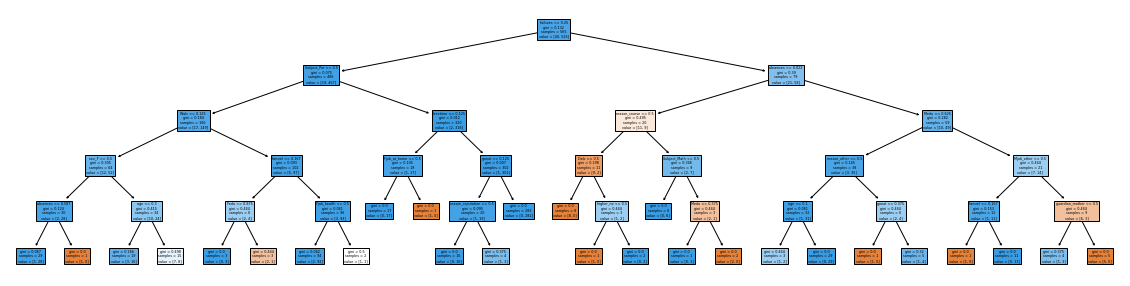

In [47]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 5))
_ = plot_tree(trees[-1], feature_names=X_train_no_G1.columns, filled=True)

Чаще всего появляются признаки:
- доля заваленных экзаменов
- доля пропущенных занятий
- выбран ли какой-то конкретный предмет
- работа родителя (какая-то определённая и другая)
- образование родителя
- поддержка в школе
- наличие платных курсов
- адрес

Написано "чаще всего", т.к. при нескольких запусках программы дерево меняется

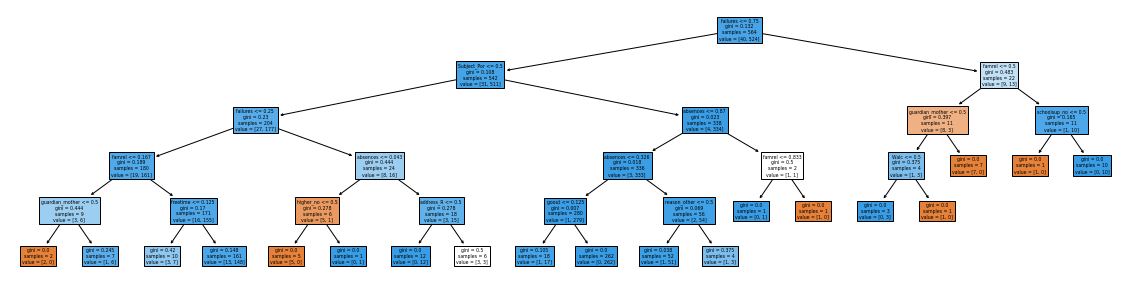

In [48]:
plt.figure(figsize=(20, 5))
_ = plot_tree(trees[0], feature_names=X_train_no_G1.columns, filled=True)

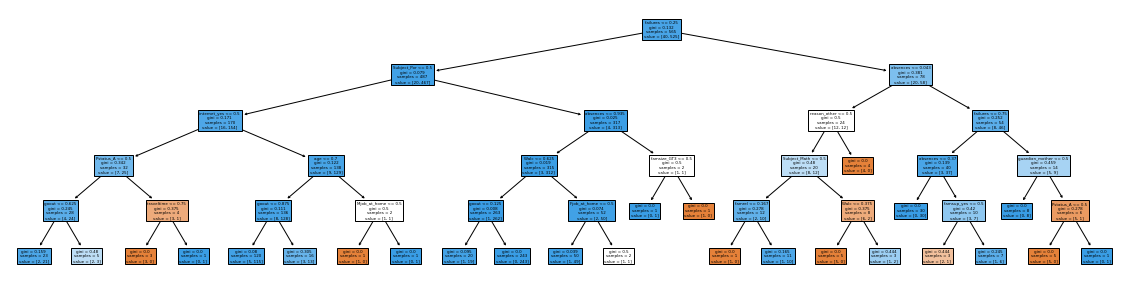

In [49]:
plt.figure(figsize=(20, 5))
_ = plot_tree(trees[1], feature_names=X_train_no_G1.columns, filled=True)

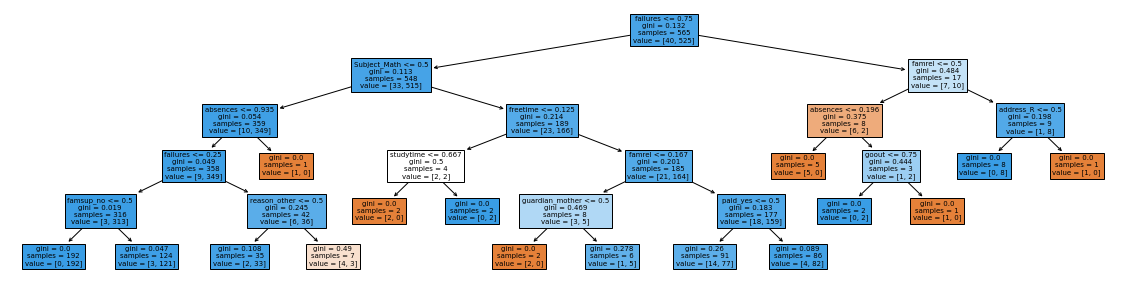

In [50]:
plt.figure(figsize=(20, 5))
_ = plot_tree(trees[2], feature_names=X_train_no_G1.columns, filled=True)

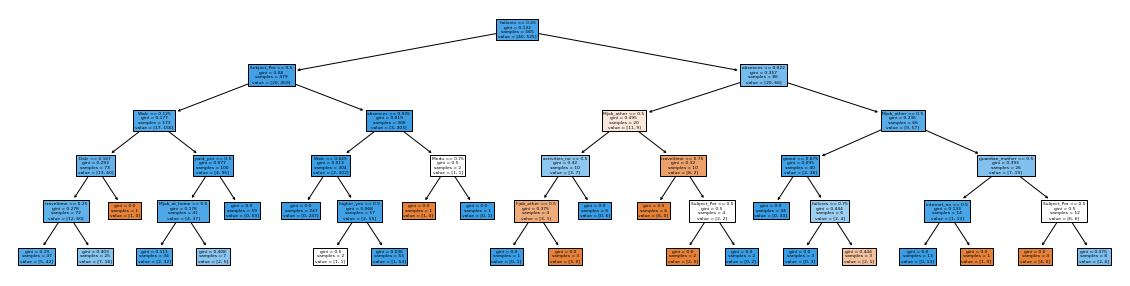

In [51]:
plt.figure(figsize=(20, 5))
_ = plot_tree(trees[3], feature_names=X_train_no_G1.columns, filled=True)

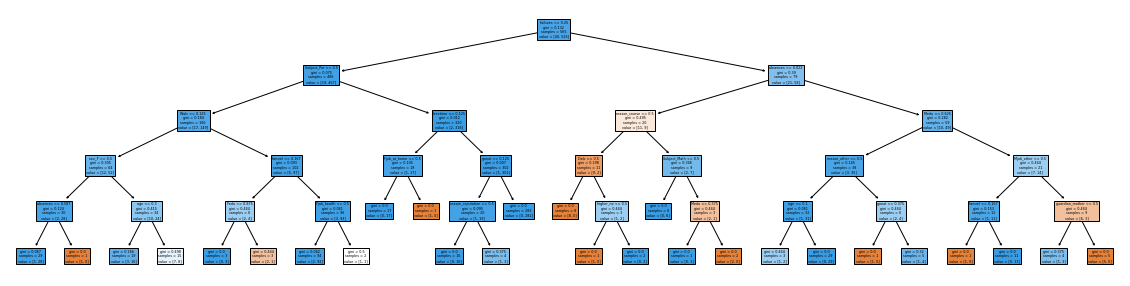

In [52]:
plt.figure(figsize=(20, 5))
_ = plot_tree(trees[4], feature_names=X_train_no_G1.columns, filled=True)

В целом, деревья получились похожие, многие узлы повторяются или полностью, или переставлены, или используют обратные условия (например предмет == Математика и предмет == Португальский)

### Задание 2  
  
На кросс-валидации (5-fold из 2 повторений) оцените, как меняется качество модели Random Forest с ростом числа деревьев (при дефолтных значениях остальных параметров). Провизуализируйте результаты. Сколько деревьев достаточно в данном случае и почему?  
**NB:** В сравнение включите конфигурацию, аналогичную простому дереву решений. 

In [53]:
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [54]:
rkf = RepeatedKFold(n_splits=5, n_repeats=2)
    
n_trees = range(1, 200, 5)
random_scores = []
basic_scores = []

for i in n_trees:
    random_score = cross_val_score(RandomForestClassifier(n_estimators=i), X_train_no_G1, y_train_will_pass, cv=rkf)
    random_scores.append(random_score)
    
    basic_score = cross_val_score(DecisionTreeClassifier(), X_train_no_G1, y_train_will_pass, cv=rkf)
    basic_scores.append(basic_score)

Покажем, как менялся наименьший и наибольший cross_val_score с измененим числа деревьев. Для сравнения красным показан наибольший и наименьший cross_val_score у простого дерева

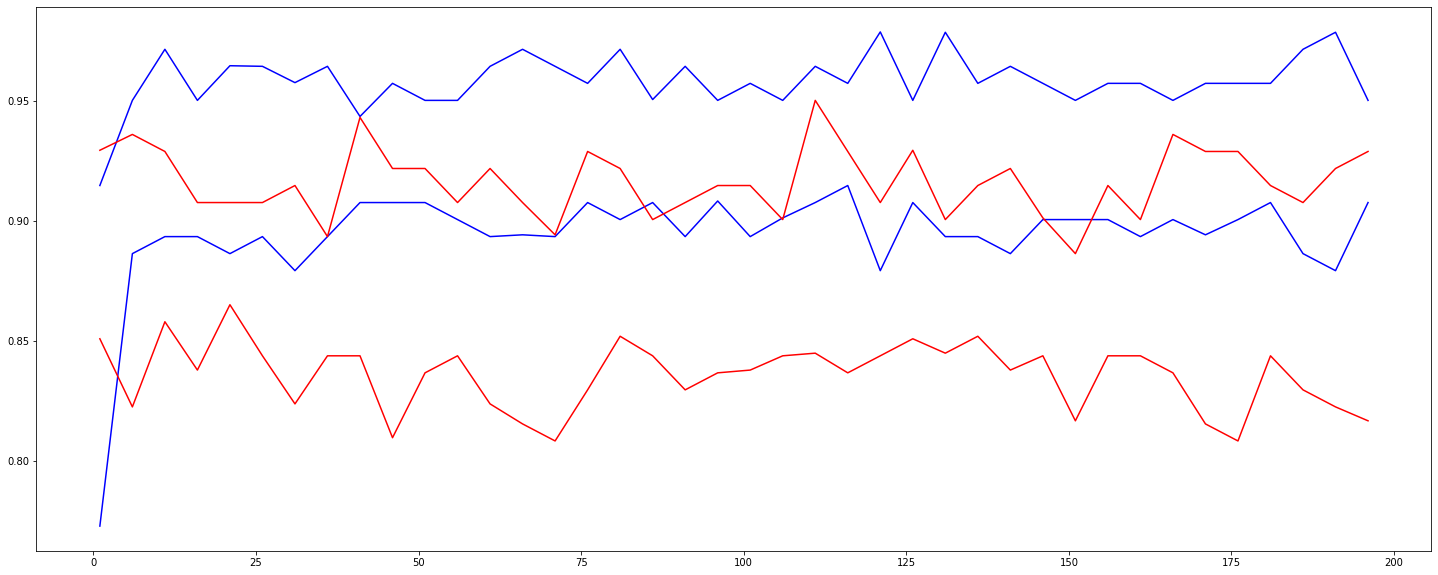

In [55]:
plt.figure(figsize=(25, 10))
plt.plot(n_trees, [(min(scores), max(scores)) for scores in random_scores], 'b')
plt.plot(n_trees, [(min(scores), max(scores)) for scores in basic_scores], 'r')

Можно было бы сказать, что достаточно 25 деревьев, т.к. именно на этой отметке наблюдается наибольший из наибольших cross_val_score, однако в этой же точке большой отрыв от наименьшего. В целом видно, что где есть пики, там же есть и провалы, а разброс значения уменьшается при увеличении числа деревьев.

Нужно найти точку, где расхождения в величинах будут наименьшими и достаточно большими в целом - это будет свидетельствовать о высоком качестве дерева и его стабильности. Под такой критерий подходят точки в районе 75, 90 и 160 деревьев.

Простое же дерево решений ведёт себя крайне непредсказуемо.

### Задание 3  
  
* Настройте гиперпараметры модели Random Forest на 5-fold валидиации. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.
* Обучите Random Forest  с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество (F1-score) всего ансамбля и <u>каждого дерева отдельно</u>. Постройте график распределения качества деревьев в ансамбле и сравните результаты с качеством всего леса. Дайте комментарий.  
* Выведите важность признаков в Random Forest, сделайте выводы. 

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from time import time

In [57]:
rfc_params = {
    'n_estimators': range(1, 200),
    'criterion': ['gini', 'entropy'],
    'max_depth': range(5, 15),
    'min_samples_split': range(2, 20),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [58]:
t = time()
rfc_trying_best_no_G1 = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rfc_params,
    scoring='f1',
    cv=StratifiedKFold(n_splits=5),
    n_iter=25
).fit(X_train_no_G1, y_train_will_pass)
print(time() - t, 'sec')

60.569151878356934 sec


In [59]:
rfc_trying_best_no_G1.best_params_

{'n_estimators': 14,
 'min_samples_split': 12,
 'max_features': None,
 'max_depth': 6,
 'criterion': 'gini'}

Лучшие параметры от запуска к запуску меняются, а GridSearchCV с такой решёткой будет работать очень долго, поэтому здесь применяется RandomizedSearchCV

In [60]:
random_forest = rfc_trying_best_no_G1.best_estimator_.fit(X_train_no_G1, y_train_will_pass)

In [61]:
f1_scores = []

for single_forest in random_forest.estimators_:
    f1_scores.append(f1_score(y_test_will_pass, single_forest.predict(X_test_no_G1)))

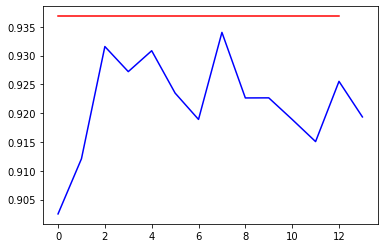

In [62]:
plt.plot([f1_score(y_test_will_pass, random_forest.predict(X_test_no_G1)) for i in range(1, len(f1_scores))], 'r')
plt.plot(f1_scores, 'b')

Как можно видеть, общее качество ансамбля выше среднего. Также наблюдаются большие "скачки" в качестве между соседними деревьями

In [63]:
pd.DataFrame(random_forest.feature_importances_, index=X_train_no_G1.columns, columns=['Importance']).sort_values('Importance', ascending=False)

,Importance
failures,0.170394
absences,0.161634
Mjob_other,0.067200
goout,0.060442
freetime,0.055551
Subject_Math,0.055494
famrel,0.040560
Medu,0.027407
Subject_Por,0.026156
guardian_other,0.025736


Как можно видеть из таблицы, наиболее значимыми посчитались признаки выбранного предмета, пропущенных занятий,заваленных экзаменов, возраста, времени с друзьями и свободного времени. Этот вывод совпадает с тем, что был сделан при описании деревьев ранее

### Задание 4  
  
* Примените логистическую регрессию для решения задачи, подберите оптимальные значения гиперпараметров. Оцените качество (roc auc) на 5-fold валидации из 2 повторений. 
* Аналогично (на такой же валидации (тех же подвыборках) с такой же метрикой) оцените качество Random Forest  с подобранными в предыдущем задании параметрами. Сравните с качеством логистическом регрессии.
* Обучите логистическую модель с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество - постройте ROC-кривую, вычислите roc auc. Вычислите аналогичную метрику для Random Forest из Задания 3, сравните точность моделей. 

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [65]:
lr_params = {
    'C': np.linspace(1e-4, 1000, 200),
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced'],
    'solver': ['liblinear'],
    'tol': np.linspace(1e-6, 1, 1000)
}

In [66]:
t = time()
lr_trying_best = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=lr_params,
    scoring='roc_auc',
    cv=RepeatedKFold(n_splits=5, n_repeats=2),
    n_iter=25
).fit(X_train_no_G1, y_train_will_pass)
print(time() - t, 'sec')

5.830196142196655 sec


In [67]:
lr_trying_best.best_params_

{'tol': 0.45445499999999994,
 'solver': 'liblinear',
 'penalty': 'l2',
 'class_weight': 'balanced',
 'C': 10.050350251256281}

In [68]:
logistic_regression = lr_trying_best.best_estimator_

In [69]:
logistic_rocs = []
random_rocs = []

for train_index, test_index in RepeatedKFold(n_splits=5, n_repeats=2).split(X_train_no_G1, y_train_will_pass):
    X_train_curr, X_test_curr = X_train_no_G1.to_numpy()[train_index], X_train_no_G1.to_numpy()[test_index]
    y_train_curr, y_test_curr = y_train_will_pass.array[train_index], y_train_will_pass.array[test_index]
    random_forest.fit(X_train_curr, y_train_curr)
    logistic_regression.fit(X_train_curr, y_train_curr)
    random_rocs.append(roc_auc_score(y_test_curr, random_forest.predict(X_test_curr)))
    logistic_rocs.append(roc_auc_score(y_test_curr, logistic_regression.predict(X_test_curr)))

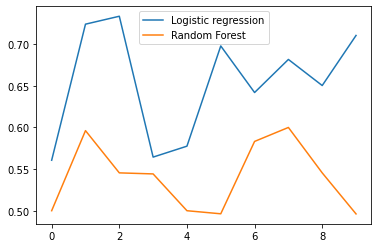

In [70]:
plt.plot(logistic_rocs, label='Logistic regression')
plt.plot(random_rocs, label='Random Forest')
plt.legend()

Как можно видеть, точность Логистической регрссии гораздо выше Случайного леса. Более того, ROC AUC Случайного леса близок к 0.5, что говорит о плохом качестве - модель не лучше рандома - и переобучении.

In [71]:
logistic_regression.fit(X_train_no_G1, y_train_will_pass)
random_forest.fit(X_train_no_G1, y_train_will_pass)

RandomForestClassifier(max_depth=6, max_features=None, min_samples_split=12,
                       n_estimators=14)

In [72]:
from sklearn.metrics import plot_roc_curve

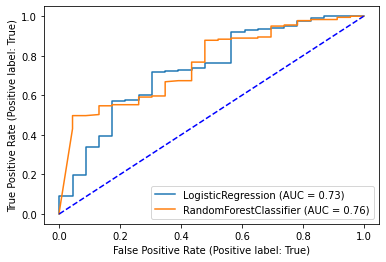

In [73]:
ax = plt.gca()

logreg_disp = plot_roc_curve(logistic_regression, X_test_no_G1, y_test_will_pass,ax=ax)
randfor_disp = plot_roc_curve(random_forest, X_test_no_G1, y_test_will_pass, ax=ax)
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), '--b')

plt.legend()

При обучении на всех данных, метрики моделей стали заметно лучше и почти сравнялись.

### Задание 5  
  
* Используйте для решения задачи один из фреймворков градиентного бустинга: XGBoost, LightGDB или CatBoost.  
* Оцените на 5-fold валидации, как растет качество модели на обучающей и на тестовой выборках при добавлении каждого дерева. Провизуализируйте результаты.  
* Настройте гиперпараметры модели на 5-fold валидации, в качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.  
* Обучите модель с настроенными параметрами на всех данных для моделирования и оцените качество на отложенной выборке. Сравните результаты с другими моделями, дайте комментарий.

In [74]:
from catboost import CatBoostClassifier, Pool

In [75]:
X_train_typed_no_G1 = X_train_no_G1.copy()
X_train_typed_no_G1[categ] = X_train_typed_no_G1[categ].astype('int64')

X_test_typed_no_G1  =  X_test_no_G1.copy()
X_test_typed_no_G1[categ] = X_test_typed_no_G1[categ].astype('int64')

y_train_typed = [1 if y else 0 for y in y_train_will_pass]
y_test_typed = [1 if y else 0 for y in y_test_will_pass]

In [76]:
cat_features = categ

cbc = CatBoostClassifier()
cbc.fit(X_train_typed_no_G1, y_train_typed, cat_features=cat_features, verbose=False)

roc_auc_score(y_test_typed, cbc.predict(X_test_typed_no_G1))

0.5217391304347826

In [77]:
n_trees = range(1, 20, 2)
catboost_scores = []

for i in n_trees:
    cbc = CatBoostClassifier(n_estimators=i)
    catboost_score = cross_val_score(cbc, X_train_typed_no_G1, y_train_typed, cv=skf, scoring='roc_auc')
    catboost_scores.append(catboost_score)
    print(cbc.is_fitted())

Learning rate set to 0.5
0:	learn: 0.2870077	total: 6.02ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.2950157	total: 10.8ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.3042394	total: 8.64ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.3007882	total: 13.7ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.3077222	total: 16.8ms	remaining: 0us
False
Learning rate set to 0.5
0:	learn: 0.3044688	total: 5.75ms	remaining: 11.5ms
1:	learn: 0.2134056	total: 15.2ms	remaining: 7.58ms
2:	learn: 0.1837793	total: 19.8ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.2919782	total: 28.9ms	remaining: 57.9ms
1:	learn: 0.1947266	total: 41ms	remaining: 20.5ms
2:	learn: 0.1594013	total: 56.8ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.2950233	total: 6.32ms	remaining: 12.6ms
1:	learn: 0.1953786	total: 10.5ms	remaining: 5.26ms
2:	learn: 0.1616753	total: 29.8ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.3084875	total: 8.73ms	remaining: 17.5ms
1:	learn: 0.201

3:	learn: 0.1583005	total: 46.2ms	remaining: 80.8ms
4:	learn: 0.1421220	total: 64.2ms	remaining: 77ms
5:	learn: 0.1262696	total: 76.8ms	remaining: 64ms
6:	learn: 0.1200755	total: 81.6ms	remaining: 46.6ms
7:	learn: 0.1081584	total: 90.9ms	remaining: 34.1ms
8:	learn: 0.0990466	total: 94.8ms	remaining: 21.1ms
9:	learn: 0.0856258	total: 98.7ms	remaining: 9.87ms
10:	learn: 0.0770263	total: 121ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.2893270	total: 9.26ms	remaining: 92.6ms
1:	learn: 0.1936812	total: 45.1ms	remaining: 203ms
2:	learn: 0.1578540	total: 50.4ms	remaining: 134ms
3:	learn: 0.1409221	total: 61ms	remaining: 107ms
4:	learn: 0.1183905	total: 65.6ms	remaining: 78.7ms
5:	learn: 0.1061037	total: 70.4ms	remaining: 58.7ms
6:	learn: 0.0960489	total: 84.4ms	remaining: 48.2ms
7:	learn: 0.0842970	total: 92.6ms	remaining: 34.7ms
8:	learn: 0.0778782	total: 97.7ms	remaining: 21.7ms
9:	learn: 0.0695289	total: 102ms	remaining: 10.2ms
10:	learn: 0.0653200	total: 113ms	remaining: 0us
Lea

Learning rate set to 0.379825
0:	learn: 0.3610440	total: 4.43ms	remaining: 62.1ms
1:	learn: 0.2619449	total: 8.76ms	remaining: 57ms
2:	learn: 0.2070973	total: 20.7ms	remaining: 82.9ms
3:	learn: 0.1790975	total: 39.1ms	remaining: 108ms
4:	learn: 0.1655002	total: 52ms	remaining: 104ms
5:	learn: 0.1446254	total: 70.9ms	remaining: 106ms
6:	learn: 0.1288300	total: 76.6ms	remaining: 87.6ms
7:	learn: 0.1191885	total: 84.3ms	remaining: 73.7ms
8:	learn: 0.1105185	total: 103ms	remaining: 68.6ms
9:	learn: 0.1025518	total: 121ms	remaining: 60.7ms
10:	learn: 0.0935494	total: 129ms	remaining: 46.9ms
11:	learn: 0.0867595	total: 133ms	remaining: 33.2ms
12:	learn: 0.0790956	total: 137ms	remaining: 21.1ms
13:	learn: 0.0753335	total: 141ms	remaining: 10.1ms
14:	learn: 0.0705826	total: 146ms	remaining: 0us
False
Learning rate set to 0.338383
0:	learn: 0.3784546	total: 7.86ms	remaining: 126ms
1:	learn: 0.2604019	total: 23.9ms	remaining: 179ms
2:	learn: 0.2222696	total: 34.6ms	remaining: 162ms
3:	learn: 0.1

Learning rate set to 0.305803
0:	learn: 0.3908044	total: 8.13ms	remaining: 146ms
1:	learn: 0.2796386	total: 14.5ms	remaining: 123ms
2:	learn: 0.2242339	total: 25.2ms	remaining: 135ms
3:	learn: 0.1909364	total: 41.6ms	remaining: 156ms
4:	learn: 0.1667827	total: 62.5ms	remaining: 175ms
5:	learn: 0.1573558	total: 68.7ms	remaining: 149ms
6:	learn: 0.1498612	total: 87.9ms	remaining: 151ms
7:	learn: 0.1374545	total: 109ms	remaining: 150ms
8:	learn: 0.1273526	total: 117ms	remaining: 130ms
9:	learn: 0.1192657	total: 129ms	remaining: 116ms
10:	learn: 0.1097161	total: 146ms	remaining: 106ms
11:	learn: 0.1042834	total: 163ms	remaining: 94.9ms
12:	learn: 0.0972252	total: 175ms	remaining: 80.9ms
13:	learn: 0.0891158	total: 182ms	remaining: 64.9ms
14:	learn: 0.0818638	total: 193ms	remaining: 51.5ms
15:	learn: 0.0767999	total: 203ms	remaining: 38.1ms
16:	learn: 0.0669875	total: 208ms	remaining: 24.5ms
17:	learn: 0.0631116	total: 220ms	remaining: 12.2ms
18:	learn: 0.0592705	total: 226ms	remaining: 0us

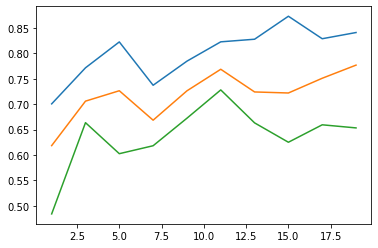

In [78]:
plt.plot(n_trees, [(max(scores), np.mean(scores), min(scores)) for scores in catboost_scores])

Как можно видеть по графикам максимального и минимального значения метрики ROC AUC, при увеличении числа деревьев метрика в целом растёт

In [79]:
cbc_params = {
    'n_estimators': range(1, 20),
    'learning_rate': np.linspace(1e-3, 1, 1000),
    'depth': range(1, 10),
    'feature_border_type': ['Median', 'Uniform', 'UniformAndQuantiles', 'GreedyLogSum', 'MaxLogSum', 'MinEntropy']
}

In [80]:
t = time()
cbc_trying_best_no_G1 = RandomizedSearchCV(
    estimator=CatBoostClassifier(),
    param_distributions=cbc_params,
    scoring='f1',
    cv=StratifiedKFold(n_splits=5),
    n_iter=25
).fit(X_train_typed_no_G1, y_train_typed, cat_features=cat_features)
print(time() - t, 'sec')

0:	learn: 0.2264925	total: 11.3ms	remaining: 191ms
1:	learn: 0.1403307	total: 31.9ms	remaining: 255ms
2:	learn: 0.1024396	total: 51ms	remaining: 255ms
3:	learn: 0.0804269	total: 72.5ms	remaining: 254ms
4:	learn: 0.0594194	total: 86.1ms	remaining: 224ms
5:	learn: 0.0489949	total: 115ms	remaining: 231ms
6:	learn: 0.0381578	total: 141ms	remaining: 221ms
7:	learn: 0.0332396	total: 151ms	remaining: 189ms
8:	learn: 0.0297289	total: 165ms	remaining: 165ms
9:	learn: 0.0211808	total: 188ms	remaining: 150ms
10:	learn: 0.0188130	total: 205ms	remaining: 130ms
11:	learn: 0.0164069	total: 228ms	remaining: 114ms
12:	learn: 0.0137897	total: 243ms	remaining: 93.5ms
13:	learn: 0.0126674	total: 255ms	remaining: 73ms
14:	learn: 0.0114031	total: 273ms	remaining: 54.6ms
15:	learn: 0.0102488	total: 286ms	remaining: 35.8ms
16:	learn: 0.0091970	total: 297ms	remaining: 17.5ms
17:	learn: 0.0083964	total: 331ms	remaining: 0us
0:	learn: 0.2181172	total: 19.9ms	remaining: 339ms
1:	learn: 0.1437049	total: 48.5ms	rem

0:	learn: 0.3248606	total: 2.14ms	remaining: 36.4ms
1:	learn: 0.2355127	total: 5.04ms	remaining: 40.3ms
2:	learn: 0.2102056	total: 7.81ms	remaining: 39ms
3:	learn: 0.1841275	total: 14.4ms	remaining: 50.3ms
4:	learn: 0.1748378	total: 16.9ms	remaining: 44ms
5:	learn: 0.1699570	total: 26.9ms	remaining: 53.9ms
6:	learn: 0.1632805	total: 29.3ms	remaining: 46.1ms
7:	learn: 0.1586228	total: 31.1ms	remaining: 38.9ms
8:	learn: 0.1538521	total: 33.3ms	remaining: 33.3ms
9:	learn: 0.1484837	total: 42.9ms	remaining: 34.4ms
10:	learn: 0.1447578	total: 45.4ms	remaining: 28.9ms
11:	learn: 0.1391879	total: 48.4ms	remaining: 24.2ms
12:	learn: 0.1341849	total: 50.8ms	remaining: 19.5ms
13:	learn: 0.1286592	total: 56.8ms	remaining: 16.2ms
14:	learn: 0.1228158	total: 58.8ms	remaining: 11.8ms
15:	learn: 0.1187977	total: 63.8ms	remaining: 7.97ms
16:	learn: 0.1126543	total: 68.4ms	remaining: 4.02ms
17:	learn: 0.1093914	total: 70.3ms	remaining: 0us
0:	learn: 0.3329059	total: 8.01ms	remaining: 136ms
1:	learn: 0.

10:	learn: 0.0598787	total: 214ms	remaining: 97.1ms
11:	learn: 0.0553286	total: 227ms	remaining: 75.5ms
12:	learn: 0.0479981	total: 259ms	remaining: 59.7ms
13:	learn: 0.0432862	total: 267ms	remaining: 38.2ms
14:	learn: 0.0391889	total: 290ms	remaining: 19.3ms
15:	learn: 0.0361468	total: 302ms	remaining: 0us
0:	learn: 0.3299422	total: 10.8ms	remaining: 162ms
1:	learn: 0.2458692	total: 17.4ms	remaining: 121ms
2:	learn: 0.1845437	total: 29.5ms	remaining: 128ms
3:	learn: 0.1477524	total: 48.2ms	remaining: 145ms
4:	learn: 0.1204507	total: 55.3ms	remaining: 122ms
5:	learn: 0.1071384	total: 67.2ms	remaining: 112ms
6:	learn: 0.0949747	total: 91.3ms	remaining: 117ms
7:	learn: 0.0866014	total: 100ms	remaining: 100ms
8:	learn: 0.0746243	total: 125ms	remaining: 96.9ms
9:	learn: 0.0660011	total: 134ms	remaining: 80.5ms
10:	learn: 0.0577548	total: 146ms	remaining: 66.2ms
11:	learn: 0.0515756	total: 155ms	remaining: 51.7ms
12:	learn: 0.0484260	total: 164ms	remaining: 38ms
13:	learn: 0.0431434	total: 

4:	learn: 0.1881730	total: 56.1ms	remaining: 0us
0:	learn: 0.2485367	total: 13ms	remaining: 13ms
1:	learn: 0.1665029	total: 21.9ms	remaining: 0us
0:	learn: 0.2404021	total: 7.14ms	remaining: 7.14ms
1:	learn: 0.1985479	total: 26.9ms	remaining: 0us
0:	learn: 0.2402842	total: 22.3ms	remaining: 22.3ms
1:	learn: 0.1928886	total: 31ms	remaining: 0us
0:	learn: 0.2639792	total: 12.1ms	remaining: 12.1ms
1:	learn: 0.2026258	total: 18.9ms	remaining: 0us
0:	learn: 0.2411723	total: 6.17ms	remaining: 6.17ms
1:	learn: 0.1993465	total: 12.8ms	remaining: 0us
0:	learn: 0.6206757	total: 2.71ms	remaining: 38ms
1:	learn: 0.5599421	total: 5.83ms	remaining: 37.9ms
2:	learn: 0.5024259	total: 11.1ms	remaining: 44.4ms
3:	learn: 0.4563280	total: 22.4ms	remaining: 61.5ms
4:	learn: 0.4226625	total: 26.2ms	remaining: 52.5ms
5:	learn: 0.3876322	total: 29.6ms	remaining: 44.3ms
6:	learn: 0.3605617	total: 32.3ms	remaining: 37ms
7:	learn: 0.3379895	total: 36.8ms	remaining: 32.2ms
8:	learn: 0.3171694	total: 39.6ms	remain

14:	learn: 0.0142257	total: 311ms	remaining: 41.5ms
15:	learn: 0.0133960	total: 324ms	remaining: 20.3ms
16:	learn: 0.0119664	total: 335ms	remaining: 0us
0:	learn: 0.2133650	total: 11.7ms	remaining: 188ms
1:	learn: 0.1650729	total: 18.2ms	remaining: 137ms
2:	learn: 0.1439854	total: 46.9ms	remaining: 219ms
3:	learn: 0.1109668	total: 56.1ms	remaining: 182ms
4:	learn: 0.0850021	total: 63.9ms	remaining: 153ms
5:	learn: 0.0773691	total: 72.9ms	remaining: 134ms
6:	learn: 0.0752483	total: 85ms	remaining: 121ms
7:	learn: 0.0551165	total: 107ms	remaining: 120ms
8:	learn: 0.0402129	total: 113ms	remaining: 100ms
9:	learn: 0.0323623	total: 121ms	remaining: 84.4ms
10:	learn: 0.0255302	total: 128ms	remaining: 70ms
11:	learn: 0.0214986	total: 155ms	remaining: 64.6ms
12:	learn: 0.0199142	total: 161ms	remaining: 49.6ms
13:	learn: 0.0191686	total: 183ms	remaining: 39.1ms
14:	learn: 0.0156322	total: 208ms	remaining: 27.7ms
15:	learn: 0.0146855	total: 218ms	remaining: 13.6ms
16:	learn: 0.0137855	total: 247

11:	learn: 0.0515657	total: 484ms	remaining: 0us
0:	learn: 0.3738450	total: 37.9ms	remaining: 416ms
1:	learn: 0.2561082	total: 75.9ms	remaining: 379ms
2:	learn: 0.1968955	total: 115ms	remaining: 344ms
3:	learn: 0.1549753	total: 160ms	remaining: 320ms
4:	learn: 0.1297012	total: 185ms	remaining: 260ms
5:	learn: 0.1083437	total: 218ms	remaining: 218ms
6:	learn: 0.0970398	total: 250ms	remaining: 179ms
7:	learn: 0.0841893	total: 277ms	remaining: 138ms
8:	learn: 0.0812247	total: 293ms	remaining: 97.7ms
9:	learn: 0.0696222	total: 312ms	remaining: 62.4ms
10:	learn: 0.0614054	total: 346ms	remaining: 31.4ms
11:	learn: 0.0538824	total: 383ms	remaining: 0us
0:	learn: 0.3888053	total: 24.1ms	remaining: 265ms
1:	learn: 0.2670894	total: 41.8ms	remaining: 209ms
2:	learn: 0.1904016	total: 86.7ms	remaining: 260ms
3:	learn: 0.1455982	total: 107ms	remaining: 213ms
4:	learn: 0.1237792	total: 140ms	remaining: 196ms
5:	learn: 0.1035623	total: 166ms	remaining: 166ms
6:	learn: 0.0936709	total: 194ms	remaining:

4:	learn: 0.4359461	total: 78.8ms	remaining: 173ms
5:	learn: 0.4027599	total: 96.1ms	remaining: 160ms
6:	learn: 0.3747070	total: 114ms	remaining: 147ms
7:	learn: 0.3546979	total: 128ms	remaining: 128ms
8:	learn: 0.3342116	total: 143ms	remaining: 111ms
9:	learn: 0.3187488	total: 155ms	remaining: 93.3ms
10:	learn: 0.3011665	total: 168ms	remaining: 76.3ms
11:	learn: 0.2848282	total: 180ms	remaining: 59.9ms
12:	learn: 0.2672149	total: 192ms	remaining: 44.4ms
13:	learn: 0.2525975	total: 205ms	remaining: 29.3ms
14:	learn: 0.2441955	total: 217ms	remaining: 14.5ms
15:	learn: 0.2357146	total: 231ms	remaining: 0us
0:	learn: 0.2477261	total: 1.97ms	remaining: 27.6ms
1:	learn: 0.2117881	total: 3.95ms	remaining: 25.7ms
2:	learn: 0.2003255	total: 5.93ms	remaining: 23.7ms
3:	learn: 0.1806118	total: 7.71ms	remaining: 21.2ms
4:	learn: 0.1701886	total: 9.65ms	remaining: 19.3ms
5:	learn: 0.1562140	total: 11.6ms	remaining: 17.4ms
6:	learn: 0.1462594	total: 13.6ms	remaining: 15.6ms
7:	learn: 0.1342158	tota

3:	learn: 0.3865931	total: 104ms	remaining: 104ms
4:	learn: 0.3393358	total: 139ms	remaining: 83.5ms
5:	learn: 0.3089304	total: 169ms	remaining: 56.3ms
6:	learn: 0.2747982	total: 197ms	remaining: 28.2ms
7:	learn: 0.2514414	total: 225ms	remaining: 0us
0:	learn: 0.5749786	total: 46.1ms	remaining: 323ms
1:	learn: 0.4937734	total: 77.3ms	remaining: 232ms
2:	learn: 0.4251566	total: 105ms	remaining: 174ms
3:	learn: 0.3753367	total: 133ms	remaining: 133ms
4:	learn: 0.3368483	total: 189ms	remaining: 113ms
5:	learn: 0.3040097	total: 248ms	remaining: 82.5ms
6:	learn: 0.2791522	total: 285ms	remaining: 40.7ms
7:	learn: 0.2569902	total: 316ms	remaining: 0us
0:	learn: 0.5738555	total: 56.4ms	remaining: 395ms
1:	learn: 0.4910012	total: 85.6ms	remaining: 257ms
2:	learn: 0.4249662	total: 129ms	remaining: 215ms
3:	learn: 0.3728338	total: 161ms	remaining: 161ms
4:	learn: 0.3332817	total: 192ms	remaining: 115ms
5:	learn: 0.3014409	total: 509ms	remaining: 170ms
6:	learn: 0.2776596	total: 523ms	remaining: 7

5:	learn: 0.1512320	total: 299ms	remaining: 299ms
6:	learn: 0.1360751	total: 305ms	remaining: 218ms
7:	learn: 0.1232150	total: 913ms	remaining: 457ms
8:	learn: 0.1133512	total: 929ms	remaining: 310ms
9:	learn: 0.1022483	total: 936ms	remaining: 187ms
10:	learn: 0.0968743	total: 941ms	remaining: 85.5ms
11:	learn: 0.0909768	total: 946ms	remaining: 0us
0:	learn: 0.3691253	total: 11.5ms	remaining: 127ms
1:	learn: 0.2678865	total: 33ms	remaining: 165ms
2:	learn: 0.2163198	total: 38.5ms	remaining: 115ms
3:	learn: 0.1920171	total: 47.9ms	remaining: 95.9ms
4:	learn: 0.1701729	total: 80.3ms	remaining: 112ms
5:	learn: 0.1544165	total: 87.3ms	remaining: 87.3ms
6:	learn: 0.1380836	total: 510ms	remaining: 364ms
7:	learn: 0.1239738	total: 927ms	remaining: 464ms
8:	learn: 0.1104747	total: 933ms	remaining: 311ms
9:	learn: 0.1015352	total: 940ms	remaining: 188ms
10:	learn: 0.0941605	total: 947ms	remaining: 86.1ms
11:	learn: 0.0869958	total: 982ms	remaining: 0us
0:	learn: 0.3706714	total: 4.27ms	remainin

In [81]:
print(cbc_trying_best_no_G1.best_score_)
print(cbc_trying_best_no_G1.best_params_)

catboostclass = cbc_trying_best_no_G1.best_estimator_

0.9660398833600112
{'n_estimators': 12, 'learning_rate': 0.318, 'feature_border_type': 'GreedyLogSum', 'depth': 6}


In [82]:
catboostclass.fit(X_train_typed_no_G1, y_train_typed)

0:	learn: 0.3910130	total: 15.9ms	remaining: 175ms
1:	learn: 0.2793477	total: 20.4ms	remaining: 102ms
2:	learn: 0.2233768	total: 25.6ms	remaining: 76.8ms
3:	learn: 0.1953462	total: 30.7ms	remaining: 61.4ms
4:	learn: 0.1777465	total: 35.4ms	remaining: 49.6ms
5:	learn: 0.1569047	total: 41ms	remaining: 41ms
6:	learn: 0.1425600	total: 62.3ms	remaining: 44.5ms
7:	learn: 0.1343488	total: 69.8ms	remaining: 34.9ms
8:	learn: 0.1244719	total: 75.7ms	remaining: 25.2ms
9:	learn: 0.1183150	total: 81.1ms	remaining: 16.2ms
10:	learn: 0.1101017	total: 86.7ms	remaining: 7.88ms
11:	learn: 0.1007821	total: 92.3ms	remaining: 0us


In [83]:
pool = Pool(X_test_typed_no_G1, y_test_typed)

for model_name, model in models.items():
    if 'no_G1' in model_name:
        y_pred = model.predict(X_test_no_G1)
    else:
        y_pred = model.predict(X_test_G1)
    print('ROC AUC for', model_name, ':' , roc_auc_score(y_test_will_pass, y_pred))

print('ROC AUC for', 'catboost', ':', np.mean(catboostclass.eval_metrics(pool, ['AUC'])['AUC']), end='\n\n')

for model_name, model in models.items():
    if 'no_G1' in model_name:
        y_pred = model.predict(X_test_no_G1)
    else:
        y_pred = model.predict(X_test_G1)
    y_pred = [y >= 8 for y in y_pred]
    print('F1 SCORE for', model_name, ':' , f1_score(y_test_will_pass, y_pred))

print('F1 SCORE for', 'catboost', ':' , np.mean(catboostclass.eval_metrics(pool, ['F1'])['F1']))

ROC AUC for linear_G1 : 0.9249339418688446
ROC AUC for lasso_G1 : 0.5
ROC AUC for ridge_G1 : 0.8441028104732164
ROC AUC for poly_G1 : 0.4160461205861158
ROC AUC for knr_G1 : 0.668988710064857
ROC AUC for dtr_G1 : 0.9084794619264952
ROC AUC for rfr_G1 : 0.9279365841940908
ROC AUC for linear_no_G1 : 0.7381695892385298
ROC AUC for lasso_no_G1 : 0.5
ROC AUC for ridge_no_G1 : 0.7355272639923133
ROC AUC for poly_no_G1 : 0.6843622387701176
ROC AUC for knr_no_G1 : 0.6680278645207782
ROC AUC for dtr_no_G1 : 0.6755945231803988
ROC AUC for rfr_no_G1 : 0.7268796540956041
ROC AUC for catboost : 0.7559051965729843

F1 SCORE for linear_G1 : 0.9438202247191012
F1 SCORE for lasso_G1 : 0.9402597402597402
F1 SCORE for ridge_G1 : 0.9476439790575917
F1 SCORE for poly_G1 : 0.7019867549668874
F1 SCORE for knr_G1 : 0.9427083333333334
F1 SCORE for dtr_G1 : 0.9456521739130435
F1 SCORE for rfr_G1 : 0.9461756373937678
F1 SCORE for linear_no_G1 : 0.9383378016085792
F1 SCORE for lasso_no_G1 : 0.9402597402597402
F1 

CatBoost по всем метрикам находится среди остальных моделей - не лучше и не хуже

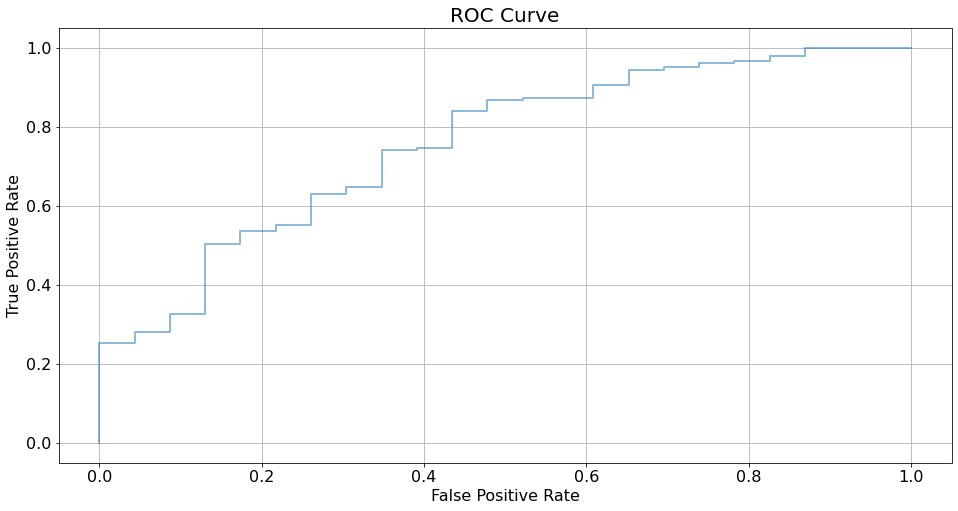

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.04347826, 0.04347826, 0.04347826,
        0.04347826, 0.04347826, 0.04347826, 0.08695652, 0.08695652,
        0.08695652, 0.08695652, 0.08695652, 0.08695652, 0.08695652,
        0.08695652, 0.08695652, 0.13043478, 0.13043478, 0.13043478,
        0.13043478, 0.13043478, 0.13043478, 0.13043478, 0.13043478,
        0.13043478, 0.13043478, 0.13043478, 0.13

In [84]:
from catboost.utils import get_roc_curve

get_roc_curve(catboostclass, pool, plot=True)

Также CatBoost показывает хорошую ROC-кривую

##  Часть 4. Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* Для решения задачи примените следующие методы:  
  * KNN  
  * Логистическая регрессия  
  * Деревья решений  
  * Random Forest
  * Gradient Boosting
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, используйте confusion matrix и производные от нее метрики. Сделайте выводы.    

In [85]:
def encode_mark(mark):
    if 18 <= mark <= 20:
        return 'excellent'
    elif 14 <= mark <= 17:
        return 'good'
    elif 8 <= mark <= 13:
        return 'satisfactory'
    elif mark < 8:
        return 'unsatisfactory'

In [86]:
# будем использовать эти ответы
y_train_encoded = [encode_mark(mark) for mark in y_train_dropped]
y_test_encoded = [encode_mark(mark) for mark in y_test_dropped]

In [87]:
X_train_typed_no_G1  # и эти данные

,address_R,address_U,internet_no,internet_yes,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,paid_no,paid_yes,Pstatus_A,Pstatus_T,guardian_father,guardian_mother,guardian_other,...,famsup_no,famsup_yes,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0.2,0.75,1.00,0.0,0.000000,0.0,0.333333,0.25,0.00,0.000000,0.75,1.00,0.695652
1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0.6,0.75,0.75,0.0,0.333333,0.5,0.666667,0.50,0.50,0.000000,0.50,1.00,0.347826
2,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0.0,0.75,0.75,0.5,0.000000,0.0,0.666667,0.00,0.50,0.000000,0.00,0.75,0.000000
3,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,...,0,1,0,0,0,1,0,0.6,0.75,0.75,0.0,0.333333,0.0,0.333333,0.25,0.75,0.333333,0.75,0.75,0.434783
4,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0.4,1.00,1.00,0.0,0.000000,0.0,1.000000,0.25,0.50,0.000000,0.25,1.00,0.173913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0.4,0.75,0.50,0.0,0.333333,0.0,1.000000,0.75,0.25,0.000000,0.00,0.50,0.173913
702,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0.0,1.00,0.00,0.5,1.000000,0.0,0.333333,0.75,0.50,0.000000,0.00,0.00,0.347826
703,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0.6,0.50,0.25,1.0,0.333333,0.5,0.666667,0.75,1.00,1.000000,0.75,1.00,0.173913
704,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0.4,1.00,0.75,0.0,0.333333,0.0,0.333333,0.25,0.50,0.000000,0.25,0.50,0.000000


In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
knc_params = {
    'n_neighbors': range(1, 15),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(1, 50),
    'metric': ['euclidean','manhattan','minkowski']
}


lr_params = {
    'C': np.linspace(1e-4, 1000, 200),
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced'],
    'solver': ['liblinear'],
    'tol': np.linspace(1e-6, 1, 1000)
}


dtc_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(2, 10),
    'min_samples_split': range(2, 10),
    'max_features': ['auto', 'sqrt', 'log2', None]
}


rfc_params = {
    'n_estimators': range(1, 200, 5),
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 10),
    'min_samples_split': range(2, 10),
    'max_features': ['auto', 'sqrt', 'log2', None]
}


gbc_params = {
    'loss': ['deviance'],
    'learning_rate': [1e-4, 1e-3, 0.01, 0.1, 1],
    'n_estimators': range(1, 200, 5),
    'criterion': ['friedman_mse', 'mse'],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [ ]:
knc_no_G1 = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=knc_params,
    scoring='accuracy',
    n_iter=25
).fit(X_train_typed_no_G1, y_train_encoded).best_estimator_

print(knc_no_G1)

lr_no_G1 = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=lr_params,
    scoring='accuracy',
    n_iter=25
).fit(X_train_typed_no_G1, y_train_encoded).best_estimator_

print(lr_no_G1)

dtc_no_G1 = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=dtc_params,
    scoring='accuracy',
    n_iter=25
).fit(X_train_typed_no_G1, y_train_encoded).best_estimator_

print(dtc_no_G1)

rfc_no_G1 = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rfc_params,
    scoring='accuracy',
    n_iter=25
).fit(X_train_typed_no_G1, y_train_encoded).best_estimator_

print(rfc_no_G1)

gbc_no_G1 = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),
    param_distributions=gbc_params,
    scoring='accuracy',
    n_iter=25
).fit(X_train_typed_no_G1, y_train_encoded).best_estimator_

print(gbc_no_G1)

KNeighborsClassifier(leaf_size=25, metric='manhattan', n_neighbors=10,
                     weights='distance')
LogisticRegression(C=286.432232160804, class_weight='balanced', penalty='l1',
                   solver='liblinear', tol=0.910911)
DecisionTreeClassifier(max_depth=5, min_samples_split=7)
RandomForestClassifier(max_depth=7, max_features=None, min_samples_split=4,
                       n_estimators=191)


In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder

In [ ]:
classifiers = {
    'KNeighborsClassifier': knc_no_G1,
    'LogisitcRegression': lr_no_G1,
    'DecisionTreeClassifier': dtc_no_G1,
    'RandomForestClassifier': rfc_no_G1,
    'GradientBoostingCLassifier': gbc_no_G1
}

In [ ]:
fig, axes = plt.subplots(ncols=1, nrows=5, figsize=(40, 30))

for clf, ax in zip(classifiers.values(), axes.flat):
    plot_confusion_matrix(clf, X_test_typed_no_G1, y_test_encoded, ax=ax)

plt.show()

Как можно видеть, все классификаторы значительно лучше распознали отметки категории "удовлетворительно"

In [ ]:
classifiers_results = pd.DataFrame(columns=['precision', 'recall', 'f1', 'accuracy', 'roc_auc'])

In [ ]:
le = LabelEncoder().fit(y_train_encoded)

for clf_name, clf in classifiers.items():
    metrics = precision_recall_fscore_support(y_test_encoded, clf.predict(X_test_typed_no_G1), average='micro')
    acc_score = accuracy_score(y_test_encoded, clf.predict(X_test_typed_no_G1))
    
    y_true = le.transform(y_test_encoded)
    
    roc_score = roc_auc_score(y_true, clf.predict_proba(X_test_typed_no_G1), multi_class='ovo')
        
    classifiers_results.loc[clf_name, 'precision'] = metrics[0]
    classifiers_results.loc[clf_name, 'recall'] = metrics[1]
    classifiers_results.loc[clf_name, 'f1'] = metrics[2]
    classifiers_results.loc[clf_name, 'accuracy'] = acc_score
    classifiers_results.loc[clf_name, 'roc_auc'] = roc_score

In [ ]:
classifiers_results

Получилось, что RandomForest справился лучше всех: по аккуратности, полноте, F1 и точности получился лучше остальных. По метрике ROC AUC же лучшим получился Градиентный Бустинг